# Проект 2. Разведывательный анализ данных

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

Наш датасет находится здесь https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/stud_math.csv

### Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

### Рекомендации по выполнению проекта
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

## 1. Первичный отсмотр данных

In [1]:
# загрузка модулей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
# загрузка датасета
stud_math = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(stud_math.head(10)) # выведем информацию по первым 10 строкам таблицы, видим, что лучше некоторые столбцы
# переименовать, то есть привести к общему виду
stud_math.info() # выведем информацию по всему датафрейму stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Видим, что в данном датафрейме 13 столбцов с колличественными (числовыми) значениями и 17 типа object, а также, что всего 3 столбца заполнеы полностью, а 27 столбцов имеют незаполненные значения.

In [3]:
stud_math.nunique() # можем посмотреть кол-во уникальных значений в каждом из столбцов

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

In [4]:
stud_math.describe() # выведем информацию по колличественным столбцам, просто для просмотра

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [5]:
stud_math.columns # посмотрим, какие есть колонки в датасете. Видим, что имеется колонка "studytime, granular", о которой
# ничего не сказано в описании, вернемся к ней позже

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Для удобства использования pandas приведём названия столбцов согласно стандарту PEP8:

In [6]:
stud_math.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_edu', 'father_edu',
                    'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time',
                    'failures', 'school_support', 'fam_support', 'paid', 'activities', 'nursery',
                    'study_time_granular', 'higher', 'internet', 'romantic', 'family_relations',
                    'free_time', 'go_out', 'health', 'absences', 'score']
display(stud_math.head()) # выведем первые 5 строк

,school,sex,age,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,fam_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [7]:
%matplotlib inline

<AxesSubplot:>

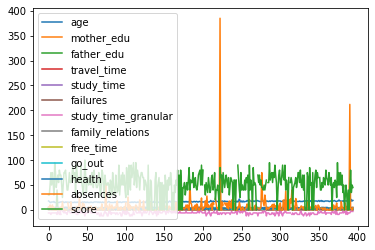

In [8]:
stud_math.plot() # построим графики для всех имеющихся в датафрейме количественных признаков

Так как столбец 'study_time_granular' в описании проекта не указан, полагаю стоит его сравнить со столбцом 'study_time', судя из почти одинакового названия.

In [9]:
display(pd.DataFrame(stud_math.study_time.value_counts()), pd.DataFrame(stud_math.study_time_granular.value_counts()))

,study_time
2.0,194
1.0,103
3.0,64
4.0,27


,study_time_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [10]:
stud_math.corr() # посмотрим, какая корреляция данных имеется в данном датасете

,age,mother_edu,father_edu,travel_time,study_time,failures,study_time_granular,family_relations,free_time,go_out,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
mother_edu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
father_edu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
travel_time,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
study_time,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
study_time_granular,0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
family_relations,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
free_time,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
go_out,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Видим, что столбцы 'study_time_granular' и 'study_time' коррелируют друг с другом на 100% . Предлагаю, удалить столбец 'study_time_granular', так как для анализа его данные не пригодятся.

In [11]:
stud_math.drop(['study_time_granular'], inplace = True, axis = 1) # удалим столбец 'study_time_granular'

In [12]:
# проверим пустые значения в датасете
stud_math.isna().sum()

school               0
sex                  0
age                  0
address             17
family_size         27
parents_status      45
mother_edu           3
father_edu          24
mother_job          19
father_job          36
reason              17
guardian            31
travel_time         28
study_time           7
failures            22
school_support       9
fam_support         39
paid                40
activities          14
nursery             16
higher              20
internet            34
romantic            31
family_relations    27
free_time           11
go_out               8
health              15
absences            12
score                6
dtype: int64

In [13]:
# выведем список пропущенных данных в % соотношении
for col in stud_math.columns:
    pct_missing = np.mean(stud_math[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0%
sex - 0%
age - 0%
address - 4%
family_size - 7%
parents_status - 11%
mother_edu - 1%
father_edu - 6%
mother_job - 5%
father_job - 9%
reason - 4%
guardian - 8%
travel_time - 7%
study_time - 2%
failures - 6%
school_support - 2%
fam_support - 10%
paid - 10%
activities - 4%
nursery - 4%
higher - 5%
internet - 9%
romantic - 8%
family_relations - 7%
free_time - 3%
go_out - 2%
health - 4%
absences - 3%
score - 2%


Видим, что число пустых значений в столбцах датасета не превышает 10%, это хорошо, продолжим работать с данными дальше.

Выведем функцию isNaN_column() для подсчета количества уникальных и пустых значений в столбце и замены пустых на None

In [14]:
def isNaN(num):
    return num != num

def isNaN_column(col):
    empty = len(col) - isNaN(col).value_counts()[False]
    print(' В столбце {}'.format(empty), 'пустых значений и {} уникальных'.format(len(col.value_counts())))
    col = col.apply(lambda x: None if isNaN(x) else None if x == 'nan' else x)
    display(col.sort_values().unique(), col.sort_values().value_counts())
    return col

Определим функцию outliers_column(), чтобы проверить датасет на наличие выбросов в столбцах и вывода некоторых статистических данных

In [15]:
def outliers_column(col):
    
    empty = len(col) - isNaN(col).value_counts()[False]
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    IQR = perc75 - perc25
    left = perc25 - 1.5*IQR
    right = perc75 + 1.5*IQR
    
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), 'IQR: {}, '.format(IQR),
          'Границы выбросов: [{l}, {r}]'.format(l=left, r=right),
          'Количество выбросов: {}.'.format(len(col) - len(col.loc[col.between(left, right)])-empty))

Определим следующий порядок действий:
- изучим оставшиеся 29 столбцов (признаков);
- к каждому столбцу применим ф-цию isNaN_column(), чтобы вывести кол-во уникальных и пустых значений в столбце, затем заменить пустые на None;
- для колличественных признаков, полагаю, стоит построить гистограммы и после опредления выбросов, решить убрать их или нет;
- для категориальных признаков пока применим только ф-цию isNaN_column(), как поступить с пустыми занчениями решим позже.

In [16]:
# school - аббревиатура школы, в которой учится ученик. Это бинарный категориальный признак.
stud_math.school = isNaN_column(stud_math.school)
# пустых значений нет, 2 уникальных значения, каждое встречается больше 30-ти раз.

 В столбце 0 пустых значений и 2 уникальных


array(['GP', 'MS'], dtype=object)

GP    349
MS     46
Name: school, dtype: int64

<AxesSubplot:title={'center':'Количество учеников по школам'}>

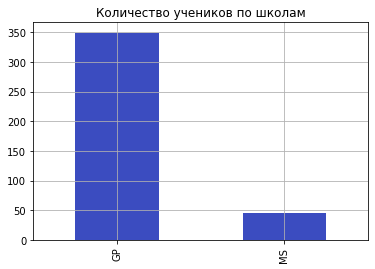

In [17]:
stud_math['school'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество учеников по школам')

<AxesSubplot:xlabel='school', ylabel='score'>

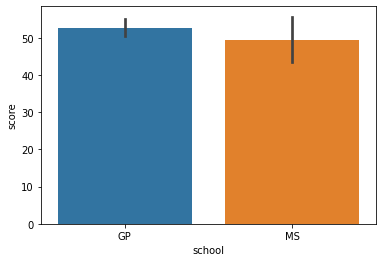

In [18]:
sns.barplot(x = 'school', y = 'score', data = stud_math)

In [19]:
# sex - — пол ученика ('F' - женский, 'M' - мужской). Аналогично столбцу school - это бинарный категориальный признак.
stud_math.sex = isNaN_column(stud_math.sex)

 В столбце 0 пустых значений и 2 уникальных


array(['F', 'M'], dtype=object)

F    208
M    187
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Количество учеников по полу'}>

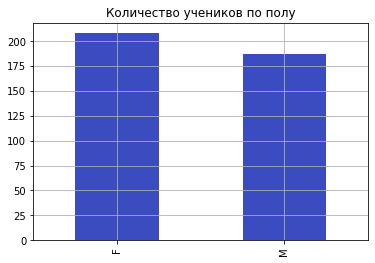

In [20]:
stud_math['sex'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество учеников по полу')

<AxesSubplot:xlabel='sex', ylabel='score'>

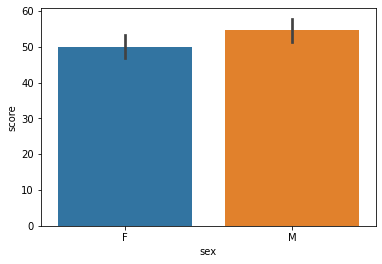

In [21]:
sns.barplot(x = 'sex', y = 'score', data = stud_math)

In [22]:
# age - — возраст ученика (от 15 до 22). Это количественный признак без пропусков, содержит 8 уникальных значений.
stud_math.age = isNaN_column(stud_math.age)

 В столбце 0 пустых значений и 8 уникальных


array([15, 16, 17, 18, 19, 20, 21, 22], dtype=int64)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

C:\Users\iskrj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0] Количество выбросов: 1.


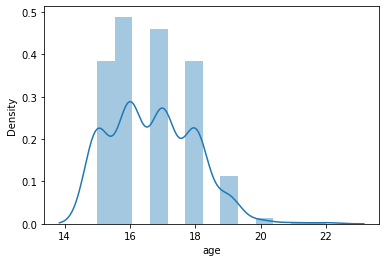

In [23]:
# age. Построим гистограмму для этого призака
sns.distplot(stud_math.age)
stud_math.age.describe()
# проверим столбец на наличие выбросов
outliers_column(stud_math.age)

<AxesSubplot:>

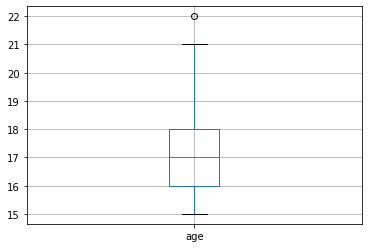

In [24]:
stud_math.boxplot(column=['age']) # видим, что есть выброс, а именно значение 22

In [25]:
# Имеется 1 выброс, считаю, что стоит его удалить.
stud_math = stud_math.loc[stud_math.age <= 21]

<AxesSubplot:xlabel='age', ylabel='score'>

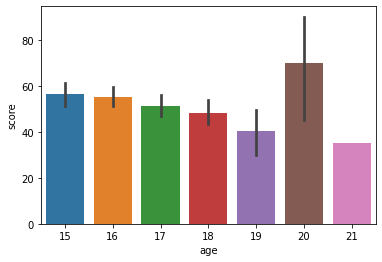

In [26]:
sns.barplot(x = 'age', y = 'score', data = stud_math)

Для анализа распределений оценок "score" по возрастам, думаю, лучше будет использовать значение возраста от 15 до 19 включительно, так как для 20 и 21 слишком мало данных.

In [27]:
# address - тип адреса ученика ('U' - городской, 'R' - за городом). Имеется 2 уникальных значения, 17 пустых.
stud_math.address = isNaN_column(stud_math.address)

 В столбце 17 пустых значений и 2 уникальных


array(['R', 'U', None], dtype=object)

U    294
R     83
Name: address, dtype: int64

C:\Users\iskrj\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='address', ylabel='score'>

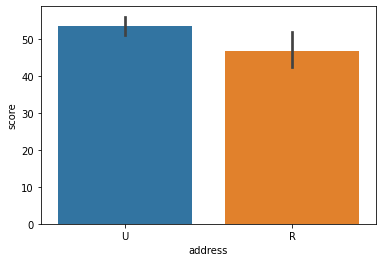

In [28]:
sns.barplot(x = 'address', y = 'score', data = stud_math)

Два уникальных зачения в столбце 'address' встречаются часто. Думаю, заменять пустые значения случайными уникальными значениями этого столбца пока не стоит (в существующей пропорции или на моду), думаю, это не повлияет на будущую модель.

In [29]:
# family_size — размер семьи('LE3' <= 3, 'GT3' >3). 2 уникальных значения, 27 пустых значений.
stud_math.family_size = isNaN_column(stud_math.family_size)
# Видим, что маленьких семей гораздо меньше, но для анализа достаточно этого кол-ва достаточно, так как больше 30.

 В столбце 27 пустых значений и 2 уникальных


array(['GT3', 'LE3', None], dtype=object)

GT3    260
LE3    107
Name: family_size, dtype: int64

<AxesSubplot:xlabel='family_size', ylabel='score'>

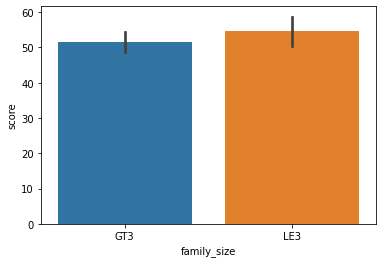

In [30]:
sns.barplot(x = 'family_size', y = 'score', data = stud_math)

In [31]:
# parents_status — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно). 2 уникальных значения, 
# 45 пустых. Для анализа дотстаточно.
stud_math.parents_status = isNaN_column(stud_math.parents_status)

 В столбце 45 пустых значений и 2 уникальных


array(['A', 'T', None], dtype=object)

T    313
A     36
Name: parents_status, dtype: int64

<AxesSubplot:xlabel='parents_status', ylabel='score'>

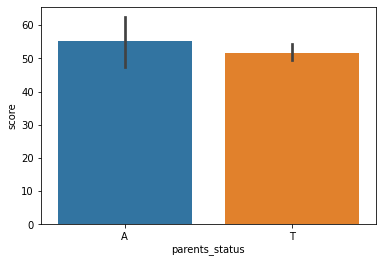

In [32]:
sns.barplot(x = 'parents_status', y = 'score', data = stud_math)

In [33]:
# mother_edu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - 
# высшее). Содержит 5 уникальных значений и всего 3 пустых.
stud_math.mother_edu = isNaN_column(stud_math.mother_edu)

 В столбце 3 пустых значений и 5 уникальных


array([ 0.,  1.,  2.,  3.,  4., nan])

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: mother_edu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0] Количество выбросов: 0.


<AxesSubplot:xlabel='mother_edu'>

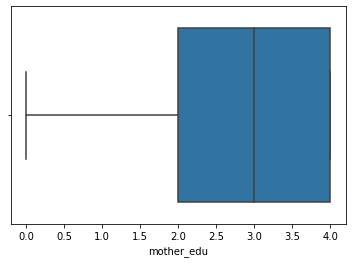

In [34]:
# mother_edu. Выбросов нет. Распределение данных сильно смещено вправо.
outliers_column(stud_math.mother_edu)
sns.boxplot(x='mother_edu', data = stud_math)

<AxesSubplot:>

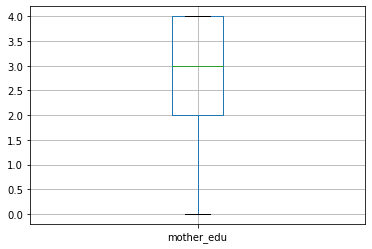

In [35]:
stud_math.boxplot(column=['mother_edu']) # видим, что выбросов нет, данные на боксплоте распределены со смещением влево

<AxesSubplot:xlabel='mother_edu', ylabel='score'>

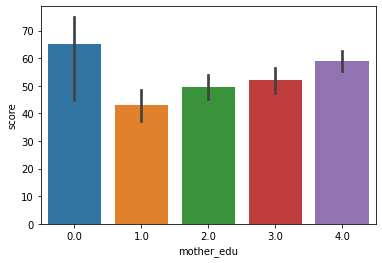

In [36]:
sns.barplot(x = 'mother_edu', y = 'score', data = stud_math)

 В столбце 24 пустых значений и 6 уникальных


array([ 0.,  1.,  2.,  3.,  4., 40., nan])

2.0     106
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: father_edu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5] Количество выбросов: 3.


<AxesSubplot:xlabel='father_edu'>

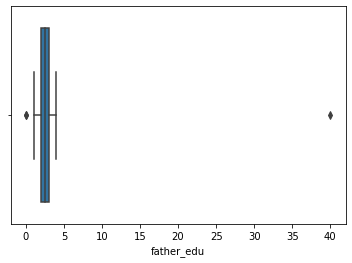

In [37]:
# father_edu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). 
# Содержит 6 уникальных значений, 24 пустых. 
stud_math.father_edu = isNaN_column(stud_math.father_edu)
# Проверяем на наличие выбросов. Видим, имеется 3 выброса.
outliers_column(stud_math.father_edu)
sns.boxplot(x='father_edu', data = stud_math)

<AxesSubplot:xlabel='father_edu'>

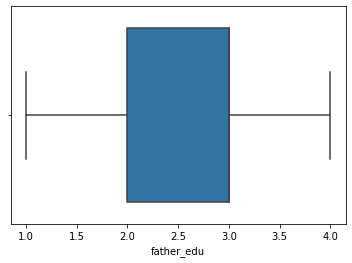

In [38]:
# father_edu. Удалим эти 3 выброса, оставляя при этом их пустыми, чтобы не терять данные в других столбцах.
stud_math = stud_math.loc[stud_math.father_edu.between(0.5, 4.5) | isNaN(stud_math.father_edu)]
sns.boxplot(x='father_edu', data = stud_math)
# Получилось, что остались 4 значенияв столбце father_edu, которые пригодны для анализа распределения оценки "score".

<AxesSubplot:xlabel='father_edu', ylabel='score'>

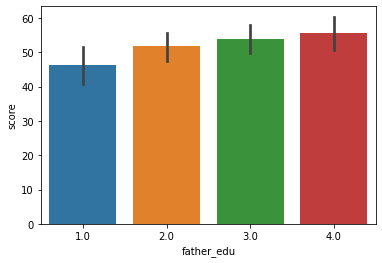

In [39]:
sns.barplot(x = 'father_edu', y = 'score', data = stud_math)

In [40]:
# mother_job — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - 
# не работает, 'other' - другое). Это категориальный признак,данных в столбце для каждого значения признака достаточно для 
# анализа оценки "score".
stud_math.mother_job = isNaN_column(stud_math.mother_job)

 В столбце 19 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

other       132
services     96
at_home      58
teacher      54
health       32
Name: mother_job, dtype: int64

<AxesSubplot:xlabel='mother_job', ylabel='score'>

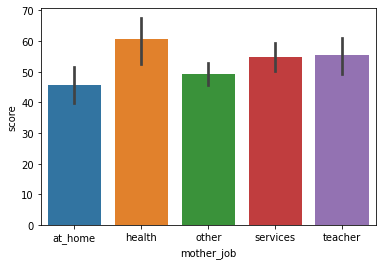

In [41]:
sns.barplot(x = 'mother_job', y = 'score', data = stud_math)

In [42]:
# father_job — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не 
# работает, 'other' - другое). Здесь количество значений at_home и health меньше 30, думаю, что для грубого анализа достаточно.
stud_math.father_job = isNaN_column(stud_math.father_job)

 В столбце 36 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

other       194
services    101
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

<AxesSubplot:xlabel='father_job', ylabel='score'>

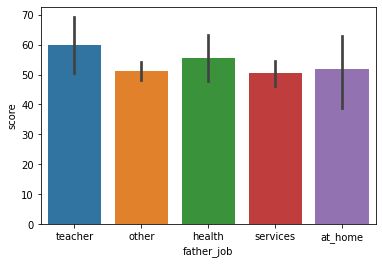

In [43]:
sns.barplot(x = 'father_job', y = 'score', data = stud_math)

In [44]:
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). 
# Это категориальный признак, содержит 17 пустых значений и 4 уникальных. Данных для анализа "score" достаточно. 
stud_math.reason = isNaN_column(stud_math.reason)

 В столбце 17 пустых значений и 4 уникальных


array(['course', 'home', 'other', 'reputation', None], dtype=object)

course        136
home          104
reputation    101
other          33
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='score'>

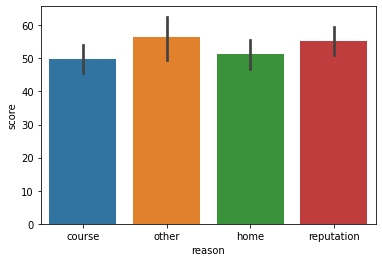

In [45]:
sns.barplot(x = 'reason', y = 'score', data = stud_math)

In [46]:
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое). Тоже категориальный признак. В столбце 31 пустых 
# значений и 3 уникальных. Также ничего пока не меняем.
stud_math.guardian = isNaN_column(stud_math.guardian)

 В столбце 31 пустых значений и 3 уникальных


array(['father', 'mother', 'other', None], dtype=object)

mother    247
father     85
other      28
Name: guardian, dtype: int64

<AxesSubplot:xlabel='guardian', ylabel='score'>

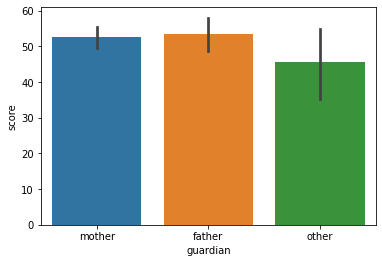

In [47]:
sns.barplot(x = 'guardian', y = 'score', data = stud_math)

 В столбце 28 пустых значений и 4 уникальных


array([ 1.,  2.,  3.,  4., nan])

1.0    241
2.0     94
3.0     21
4.0      7
Name: travel_time, dtype: int64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5] Количество выбросов: 7.


<AxesSubplot:xlabel='travel_time'>

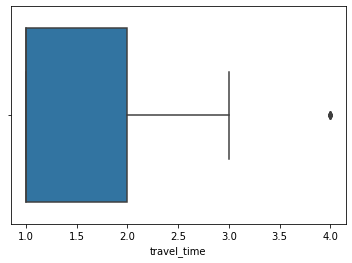

In [48]:
# travel_time — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.). Проверим данный столбец
# на наличие выбросов. Видим, что имеется 7 выбросов.
stud_math.travel_time = isNaN_column(stud_math.travel_time)
outliers_column(stud_math.travel_time)
sns.boxplot(x='travel_time', data = stud_math)

<AxesSubplot:xlabel='travel_time'>

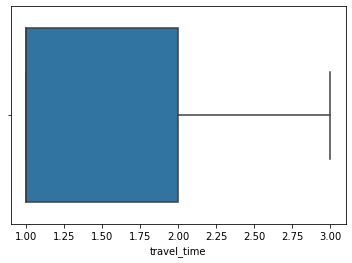

In [49]:
# travel_time. Думаю, стоит убратьэти 7 выбросов, так как их все равно мало для анализа оценки "score".
stud_math = stud_math.loc[stud_math.travel_time.between(-0.5, 3.5) | isNaN(stud_math.travel_time)]
sns.boxplot(x='travel_time', data = stud_math)

<AxesSubplot:xlabel='travel_time', ylabel='score'>

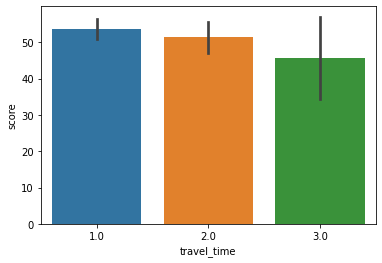

In [50]:
sns.barplot(x = 'travel_time', y = 'score', data = stud_math)

 В столбце 7 пустых значений и 4 уникальных


array([ 1.,  2.,  3.,  4., nan])

2.0    191
1.0     99
3.0     62
4.0     25
Name: study_time, dtype: int64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5] Количество выбросов: 25.


<AxesSubplot:xlabel='study_time'>

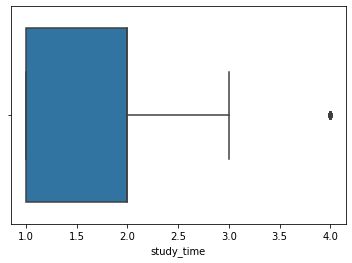

In [51]:
# study_time — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Проверим 
# данный столбец также на налчие выбросов. Думаю, так как всего 1 выброс, убирать его нет смысла, так как это значение 4.0 и
# оно в кол-ве 25 шт., этих данных для анализа score достаточно. 
stud_math.study_time = isNaN_column(stud_math.study_time)
outliers_column(stud_math.study_time)
sns.boxplot(x='study_time', data = stud_math)

<AxesSubplot:xlabel='study_time', ylabel='score'>

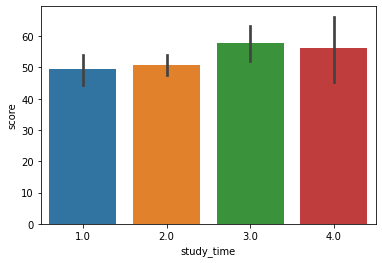

In [52]:
sns.barplot(x = 'study_time', y = 'score', data = stud_math)

 В столбце 20 пустых значений и 4 уникальных


array([ 0.,  1.,  2.,  3., nan])

0.0    287
1.0     49
2.0     16
3.0     12
Name: failures, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0] Количество выбросов: 77.


<AxesSubplot:xlabel='failures'>

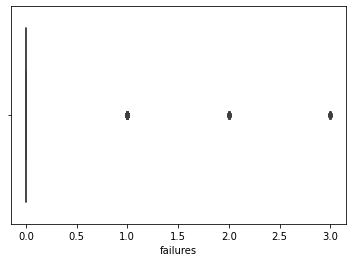

In [53]:
# failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4). Распределение данных сильно смещено влево, поэтому
# анализ на выбросы ничего конкретного не дает нам. Удалять их поэтому тоже не нужно, на мой взгляд, их 77 штук.
stud_math.failures = isNaN_column(stud_math.failures)
outliers_column(stud_math.failures)
sns.boxplot(x='failures', data = stud_math)

<AxesSubplot:xlabel='failures', ylabel='score'>

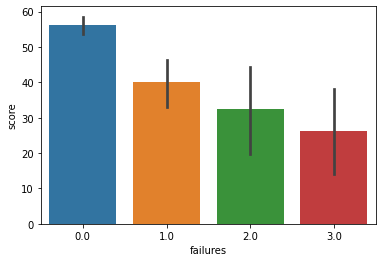

In [54]:
sns.barplot(x = 'failures', y = 'score', data = stud_math)

In [55]:
# school_support — дополнительная образовательная поддержка (yes или no). Следующие 8 столбцов содержат бинарные 
# категориальные признаки, ничего странного в этих данных не вижу.
stud_math.school_support = isNaN_column(stud_math.school_support)

 В столбце 9 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

no     326
yes     49
Name: school_support, dtype: int64

<AxesSubplot:xlabel='school_support', ylabel='score'>

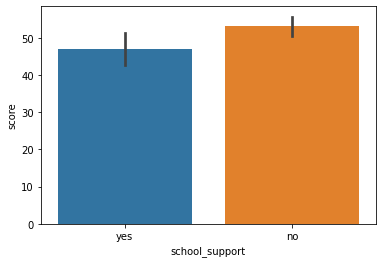

In [56]:
sns.barplot(x = 'school_support', y = 'score', data = stud_math)

In [57]:
# fam_support — семейная образовательная поддержка (yes или no).
stud_math.fam_support = isNaN_column(stud_math.fam_support)

 В столбце 36 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    215
no     133
Name: fam_support, dtype: int64

<AxesSubplot:xlabel='fam_support', ylabel='score'>

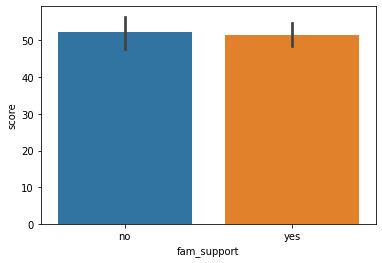

In [58]:
sns.barplot(x = 'fam_support', y = 'score', data = stud_math)

In [59]:
# paid — дополнительные платные занятия по математике (yes или no).
stud_math.paid = isNaN_column(stud_math.paid)

 В столбце 39 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

no     193
yes    152
Name: paid, dtype: int64

<AxesSubplot:xlabel='paid', ylabel='score'>

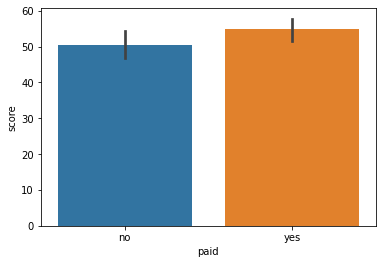

In [60]:
sns.barplot(x = 'paid', y = 'score', data = stud_math)

In [61]:
# activities — дополнительные внеучебные занятия (yes или no).
stud_math.activities = isNaN_column(stud_math.activities)

 В столбце 14 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    188
no     182
Name: activities, dtype: int64

<AxesSubplot:xlabel='activities', ylabel='score'>

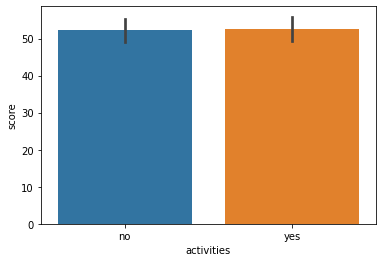

In [62]:
sns.barplot(x = 'activities', y = 'score', data = stud_math)

In [63]:
# nursery — посещал детский сад (yes или no).
stud_math.nursery = isNaN_column(stud_math.nursery)

 В столбце 16 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    291
no      77
Name: nursery, dtype: int64

<AxesSubplot:xlabel='nursery', ylabel='score'>

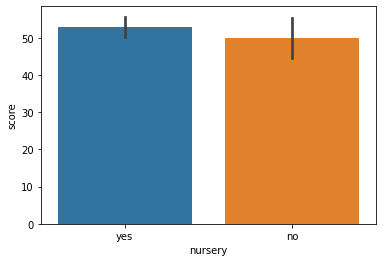

In [64]:
sns.barplot(x = 'nursery', y = 'score', data = stud_math)

In [65]:
# higher — хочет получить высшее образование (yes или no).
stud_math.higher = isNaN_column(stud_math.higher)

 В столбце 17 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    350
no      17
Name: higher, dtype: int64

<AxesSubplot:xlabel='higher', ylabel='score'>

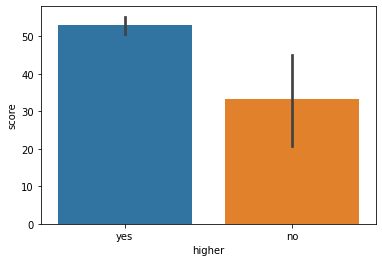

In [66]:
sns.barplot(x = 'higher', y = 'score', data = stud_math)

In [67]:
# internet — наличие интернета дома (yes или no).
stud_math.internet = isNaN_column(stud_math.internet)

 В столбце 34 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    295
no      55
Name: internet, dtype: int64

<AxesSubplot:xlabel='internet', ylabel='score'>

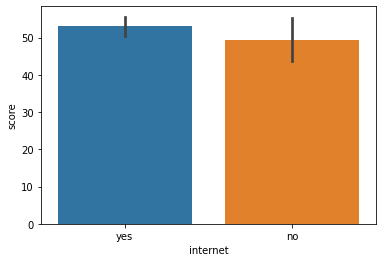

In [68]:
sns.barplot(x = 'internet', y = 'score', data = stud_math)

In [69]:
# romantic — в романтических отношениях (yes или no).
stud_math.romantic = isNaN_column(stud_math.romantic)

 В столбце 31 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

no     235
yes    118
Name: romantic, dtype: int64

<AxesSubplot:xlabel='romantic', ylabel='score'>

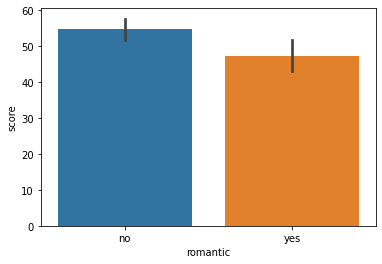

In [70]:
sns.barplot(x = 'romantic', y = 'score', data = stud_math)

 В столбце 27 пустых значений и 6 уникальных


array([-1.,  1.,  2.,  3.,  4.,  5., nan])

 4.0    177
 5.0     95
 3.0     61
 2.0     17
 1.0      6
-1.0      1
Name: family_relations, dtype: int64

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5] Количество выбросов: 24.


<AxesSubplot:xlabel='family_relations'>

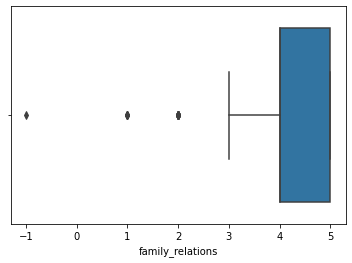

In [71]:
# family_relations — семейные отношения (от 1 - очень плохо до 5 - очень хорошо). Так как это порядковый признак, проверим 
# его на наличие выбросов.
stud_math.family_relations = isNaN_column(stud_math.family_relations)
outliers_column(stud_math.family_relations)
sns.boxplot(x='family_relations', data = stud_math)

In [72]:
# family_relations. Видно, что имеется 24 выброса, но значение "2" встречается 17 раз, поэтому оставим их,а по значениям 
# "-1" и "1" уберем, их всего 7 штук, для анализа "score", на мой взгляд, некритично.
stud_math = stud_math.loc[stud_math.family_relations.between(2.0, 5.0) | isNaN(stud_math.family_relations)]

<AxesSubplot:xlabel='family_relations', ylabel='score'>

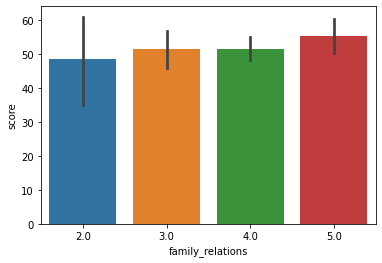

In [73]:
sns.barplot(x = 'family_relations', y = 'score', data = stud_math)

 В столбце 11 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

3.0    146
4.0    108
2.0     59
5.0     36
1.0     17
Name: free_time, dtype: int64

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5] Количество выбросов: 17.


<AxesSubplot:xlabel='free_time'>

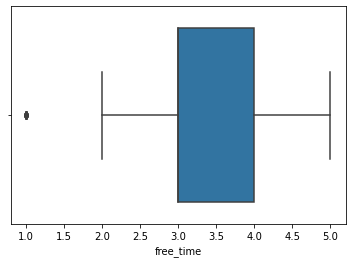

In [74]:
# free_time — свободное время после школы (от 1 - очень мало до 5 - очень мого). Это также порядковый признак. Распределение
# нормальное, выбросы убирать думаю не стоит, сильного смещения данных нет.
stud_math.free_time = isNaN_column(stud_math.free_time)
outliers_column(stud_math.free_time)
sns.boxplot(x='free_time', data = stud_math)

<AxesSubplot:xlabel='free_time', ylabel='score'>

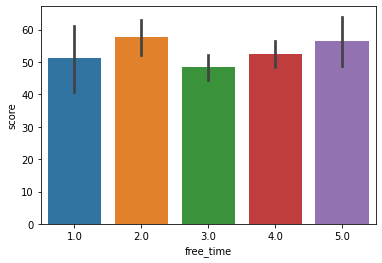

In [75]:
sns.barplot(x = 'free_time', y = 'score', data = stud_math)

 В столбце 8 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

3.0    124
2.0     93
4.0     84
5.0     46
1.0     22
Name: go_out, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0] Количество выбросов: 0.


C:\Users\iskrj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


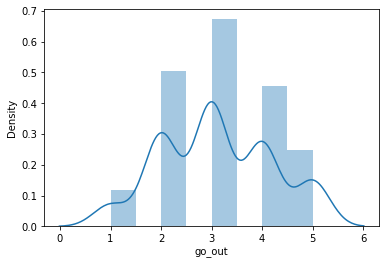

In [76]:
# go_out — проведение времени с друзьями (от 1 - очень мало до 5 - очень много).Распределение нормальное, ничего необычного
# не вижу, выбросы отсуствуют, это хорошо.
stud_math.go_out = isNaN_column(stud_math.go_out)
sns.distplot(stud_math.go_out)
outliers_column(stud_math.go_out)

<AxesSubplot:>

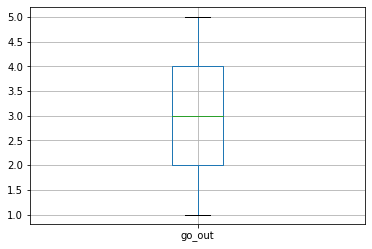

In [77]:
stud_math.boxplot(column=['go_out']) # выбросов нет

<AxesSubplot:xlabel='go_out', ylabel='score'>

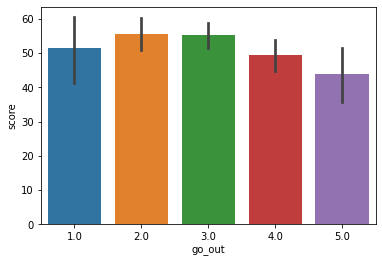

In [78]:
sns.barplot(x = 'go_out', y = 'score', data = stud_math)

 В столбце 14 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

5.0    133
3.0     86
4.0     60
2.0     43
1.0     41
Name: health, dtype: int64

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0] Количество выбросов: 0.


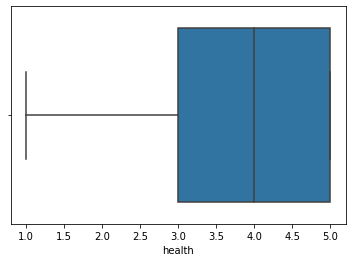

In [79]:
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо).Распределение данных нормальное, но со 
# смещением вправо, выбросы отсутствуют.
stud_math.health = isNaN_column(stud_math.health)
sns.boxplot(x='health', data = stud_math)
outliers_column(stud_math.health)

count    363.000000
mean       3.553719
std        1.378307
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

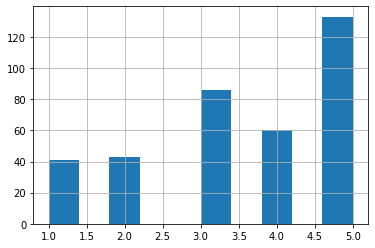

In [80]:
stud_math.health.hist()
stud_math.health.describe() # выведем статистическую информацию по столбцу

<AxesSubplot:xlabel='health', ylabel='score'>

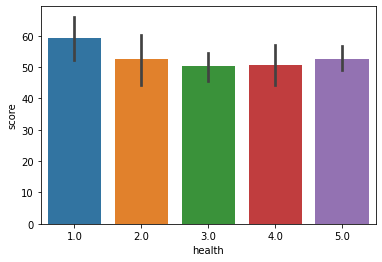

In [81]:
sns.barplot(x = 'health', y = 'score', data = stud_math)

 В столбце 12 пустых значений и 36 уникальных


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  28.,  30.,  38.,  40.,  54.,  56.,
        75., 212., 385.,  nan])

0.0      108
2.0       57
4.0       51
6.0       29
8.0       19
10.0      16
12.0      12
14.0       9
3.0        8
16.0       6
7.0        6
18.0       5
5.0        4
20.0       4
22.0       3
1.0        3
9.0        3
15.0       2
11.0       2
13.0       2
385.0      1
212.0      1
19.0       1
21.0       1
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
17.0       1
Name: absences, dtype: int64

25-й перцентиль: 0.0,

C:\Users\iskrj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0] Количество выбросов: 17.


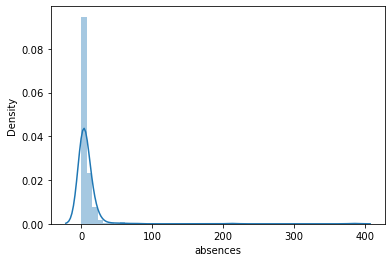

In [82]:
# absences — количество пропущенных занятий. Количественный признак. Распределение нормальное, наблюдаем малую дисперсию 
# и длинный хвост справа. 17 выбросов, которые стоит убрать, так как они встречаются 1-2 раза, для анализа "score"это не
# критично.
stud_math.absences = isNaN_column(stud_math.absences)
sns.distplot(stud_math.absences)
outliers_column(stud_math.absences)

C:\Users\iskrj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='absences', ylabel='Density'>

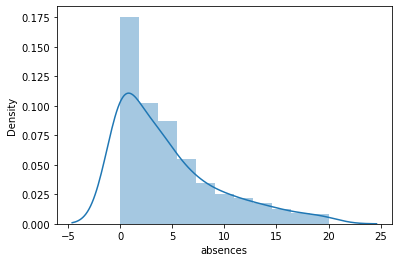

In [83]:
# absences. Убирём 17 выбросов и выведем еще раз гистограммудля наглядности.
stud_math = stud_math.loc[stud_math.absences.between(0.0, 20.0) | isNaN(stud_math.absences)]
sns.distplot(stud_math.absences)

 В столбце 6 пустых значений и 17 уникальных


array([  0.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,
        75.,  80.,  85.,  90.,  95., 100.,  nan])

50.0     50
55.0     40
0.0      36
75.0     33
65.0     28
60.0     28
70.0     27
40.0     26
45.0     22
80.0     14
30.0     14
90.0     10
35.0      8
25.0      7
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0] Количество выбросов: 0.


C:\Users\iskrj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


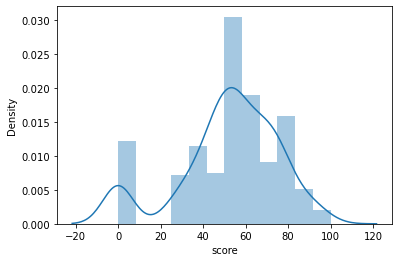

In [84]:
# score — баллы по госэкзамену по математике. Это главный, то ест целевой показатель для нашего анализа. Также это
# количественный признак. Распределены данные вцелом нормально, ничего необычного не видим. Выбросов нет.
stud_math.score = isNaN_column(stud_math.score)
sns.distplot(stud_math.score)
outliers_column(stud_math.score)

Тем самым, мы провели предварительный просмотр и обработку данных. Убрали итого 35 строк из исходного датафрейма из-за имеющихся выбросов.
Теперь, стоит перейти к отбору столбцов (значений) для построения модели формирования итоговой оценки "score".
Начнём с того, что проверим колличественные признаки на корреляцию их друг с другом.

,age,absences,score
age,1.000000,0.140293,-0.155306
absences,0.140293,1.000000,0.082726
score,-0.155306,0.082726,1.000000


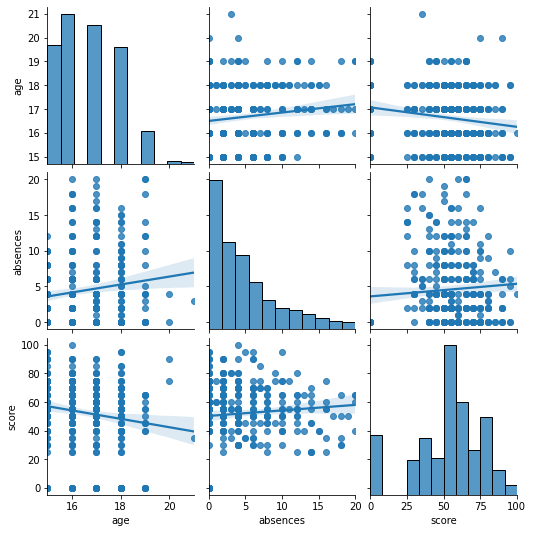

In [85]:
stud_math_new = stud_math[['age','absences','score']]
sns.pairplot(stud_math_new, kind = 'reg')
stud_math_new.corr()

Корреляция числовых переменных age и absences со "score" незначительная, оставим их для дальнейшего анализа.

Посмотрим, различаются ли распределения оценки "score" в зависимости от значений категориальных или порядковых переменных с помощью графиков boxplot.

In [86]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (7, 4))
    sns.boxplot(x=column, y='score', data=stud_math, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

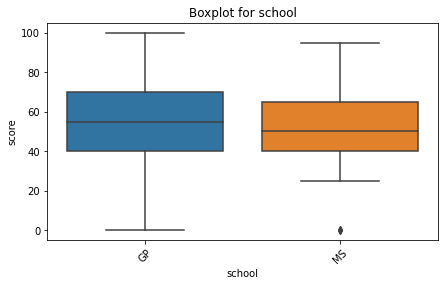

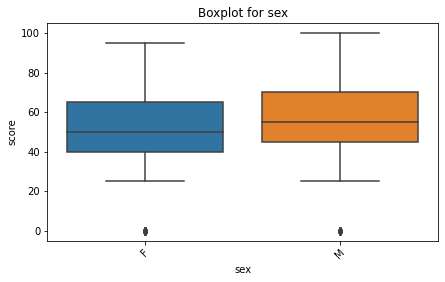

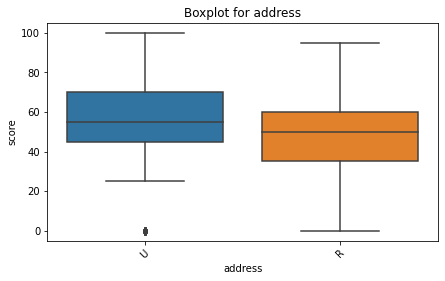

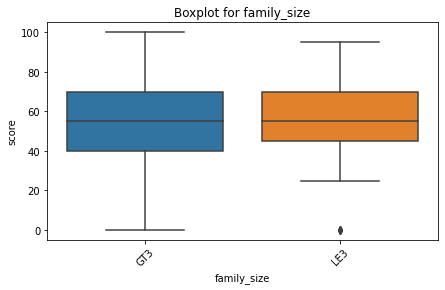

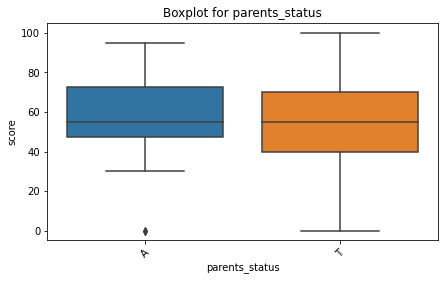

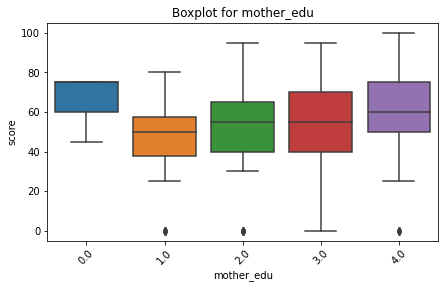

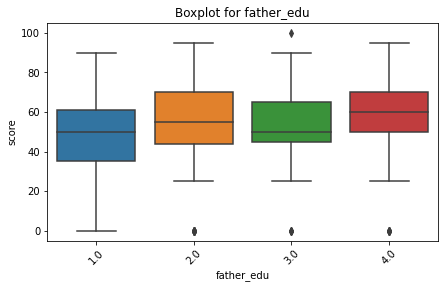

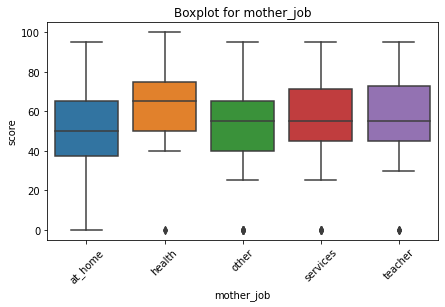

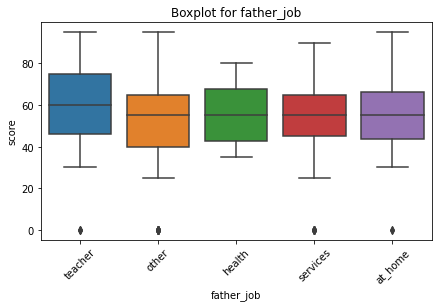

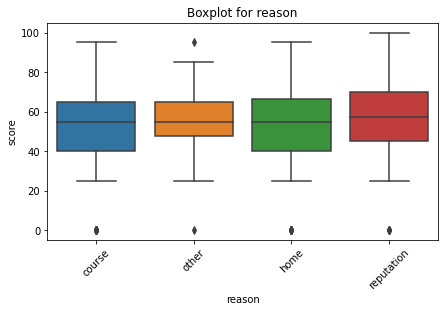

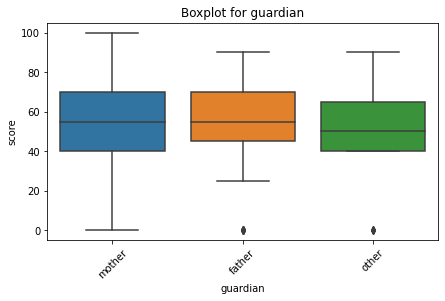

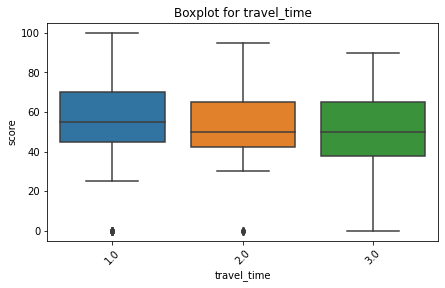

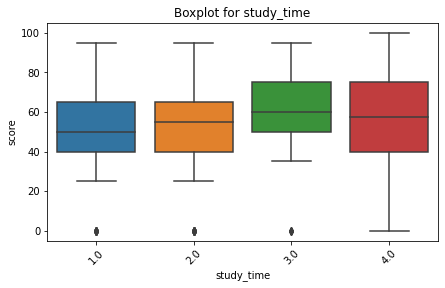

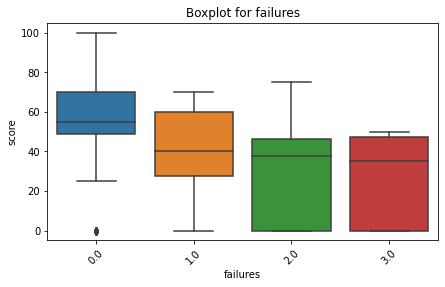

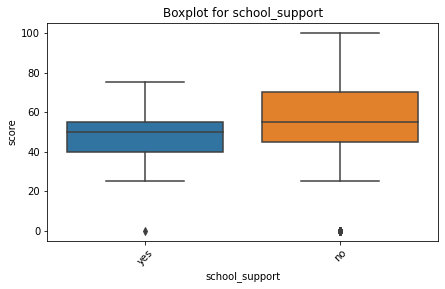

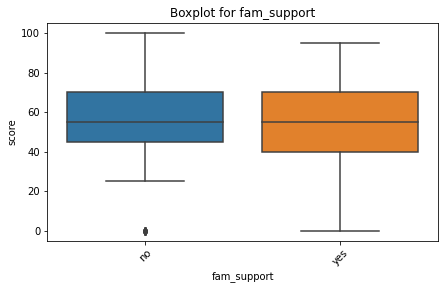

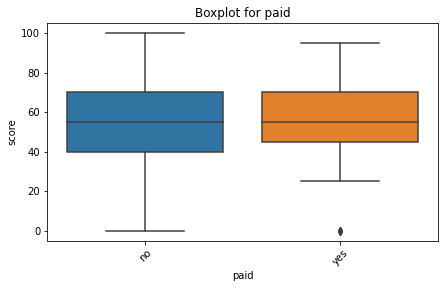

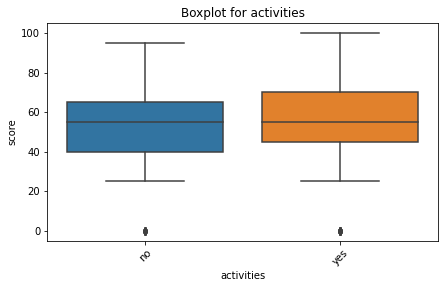

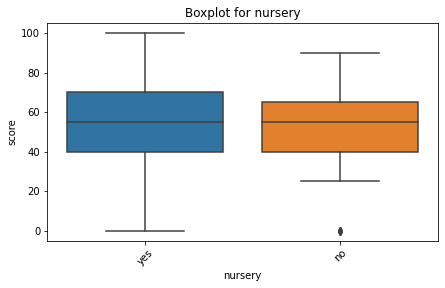

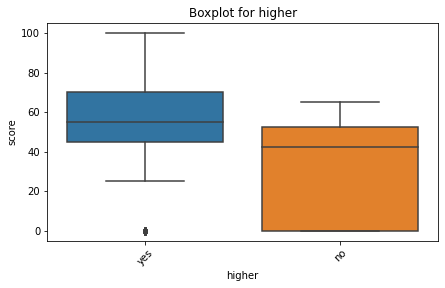

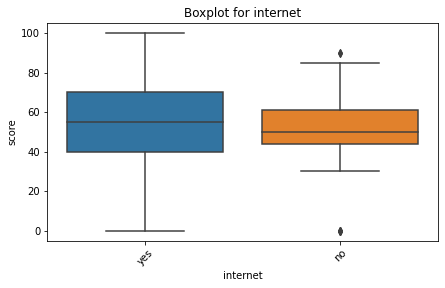

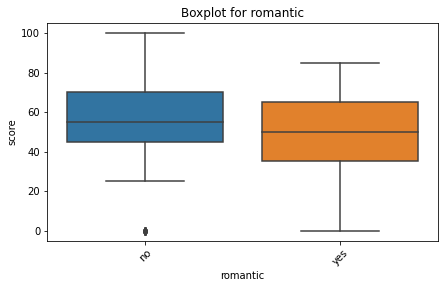

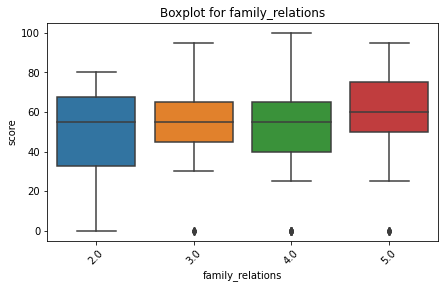

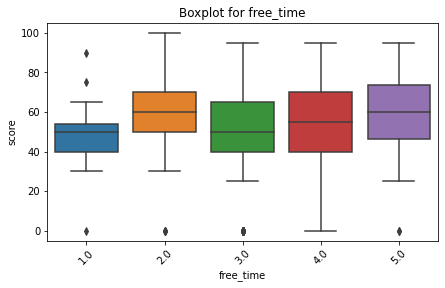

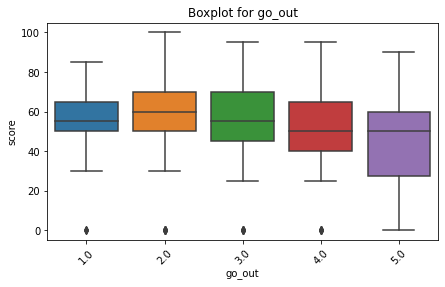

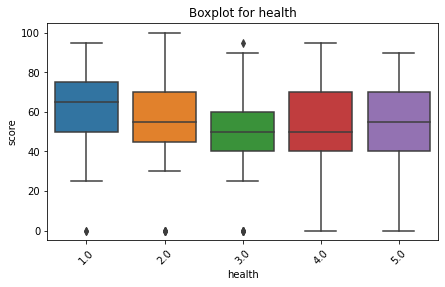

In [87]:
for column in stud_math:
    if column in ['age','absences','score']:
        continue
    else:
        get_boxplot(column)

Вывод. Можем увидеть, что в некоторых переменных имеются различия, но их существенность лучше проверить с помощью теста Стьюдента, на мой взгляд.

In [88]:
# Функция для теста Стьюдента на гипотезу о нулевой разнице параметров распределений итоговой оценки(score)
# по парам значений из категориальных или порядковых столбцов на уровне доверия 95% с учетом поправки Бонферрони

def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        pvalue = ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                           stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue
        if pvalue <= 0.05/len(combinations_all): # учтём поправку Бонферрони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [89]:
# проведем тест Стьюдента на всех категориальных или порядковых признаках
for column in stud_math:
    if column in ['age','absences','score']:
        continue
    else:
        get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_edu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Вывод. Существенные для итоговой оценки "score" различия есть только в 6 столбцах из 26. Добавим их к 2 количественным 'age' и 'absences'и получим 8 столбцов для дальнейшего анализа.

In [90]:
stud_math_model = stud_math.loc[:, ['sex', 'address', 'mother_edu', 'failures', 'higher', 'romantic', 'age', 'absences']]
stud_math_model.head()

,sex,address,mother_edu,failures,higher,romantic,age,absences
0,F,U,4.0,0.0,yes,no,18,6.0
1,F,U,1.0,0.0,yes,no,17,4.0
2,F,U,1.0,3.0,yes,None,15,10.0
3,F,U,4.0,0.0,yes,yes,15,2.0
4,F,U,3.0,0.0,yes,no,16,4.0


### Выводы:
- существующие данные в датасете достаточно полные, в среднем от 5% до 10% пустых значений на каждый столбец (признак);
- были удалены всего 35 выбросов в 5 столбцах, больше всего выбросов было в столбце "absences", 17 шт.;
- выделены 8 самых важных признаков (столбцов), которые можно использовать для построения будущей модели: sex, address, mother_edu, failures, higher, romantic, age, absences;
- признак study_time_granular линейно зависим от признака study_time, коэффициент корреляции равен -1, поэтому столбец study_time_granular было решено удалить;
- признак failures (количество внеучебных неудач) имеет хорошую корреляцию с образованием родителей (mother_edu, father_edu), а также еще более сильную корреляцию с результатами по математике score;
- хорошую скоррелированность с результатами score показывают возраст(age), время на учёбу помимо школы(study_time) и проведенное времени с друзьями(goout).

Также могу предложить еще несколько вариантов решения данного проекта:
1. Это можно было применить функцию ниже для замены незаполненных (пустых) значений в столбцах, и далее уже после этого начать проверять данные в столбцах, в том числе на выбросы и принимать решение об их удалении или замене;

In [ ]:
def null_replace(x): # заполним пропущенные и пустые значения
    for i in stud_math.columns:
        if stud_math[i].dtype == float:
            stud_math[i] = stud_math[i].fillna(stud_math[i].median())
        elif stud_math[i].dtype == object:
            stud_math[i] = stud_math[i].fillna(stud_math[i].mode()[0])
    return x

In [ ]:
new_stud_math = stud_math.apply(null_replace)
new_stud_math.info()

2. Вместо того, чтобы удалять выбросы, их можно было бы заменить или скорректировать значения, которые, возможно были внесены в датасет некорректно, например, в столбце 'father_edu' имеется значение "40", хотя диапазон значени по условию от 0 до 4, скорее всего это просто опечатка, пропущен занк разделителя (запятая), поэтому можно применить следующую функцию для исправления: 
 stud_math.loc[stud_math.father_edu == 40.0, 'father_edu'] = 4.0 
3. В столбце 'family_relations' имеется занчение "-1", хотя по условию диапазон значений должен быть от 1 до 5, скорее всего это тоже опечатка, и так как всего 1 раз оно встречвется, я бы тоже исправил эту ошибку следующей функцией:
 stud_math.loc[stud_math.family_relations == -1.0, 'family_relations'] = 1.0 
4. Незаполненные значения в категориальных признакаха (столбцах), можно было заполнить новым значением, а не модой (самым часто встречающимся значением в стобце), используем функцию fillna:
 stud_math.address = stud_math.address.fillna('unknown') 
5. Или наоборот заполнить пропуски (незаполненные данные в столбце) всё же модальным значением при помощи функции:
 stud_math.family_size = stud_math.family_size.fillna(stud_math.family_size.mode())
6. Заполнить пропуски (незаполненные данные) медианным значением в числовых признаках с помощью функции:
 stud_math.mother_edu = stud_math.mother_edu.fillna(stud_math.mother_edu.median())

#### Комментарий для ментора: 
если необходимо провести анализ и сделать выводы по нулевому, ненулевому и незаполненному датасетам отдельно и произвести сравнение призанков между друг другом, могу это сделать. В данном решении я провёл первичный анализ данных без углубления в сравнение признаков между собой.

sns.heatmap(stud_math.isnull()) # проверка наличия пропусков в датасете